In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrices 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_all = pd.read_csv('ROC_data.csv') # raw data

In [3]:
data_all.head(10)

,Unnamed: 0,LS_type,DA_area,prob_inh,prob_dyn,slope_tan,elevation,curvature,aspect,wet_index,litho,lulc
0,3970,8.0,3.0,0.0156,0.000,0.951556,2180.698,4.515543,80.28688,3.450854,5.0,71.0
1,3971,8.0,3.0,0.0124,0.000,1.093501,2166.145,3.625163,52.44894,3.311813,5.0,71.0
2,3972,8.0,3.0,0.0222,0.000,0.690770,2140.360,-1.464627,40.48208,4.597811,5.0,71.0
3,3973,8.0,3.0,0.0304,0.596,0.407125,2127.395,-1.632731,29.35348,5.113264,5.0,31.0
4,3975,8.0,3.0,0.0222,0.000,0.349647,2114.717,0.455268,51.53106,4.885499,5.0,52.0
5,6153,8.0,3.0,0.0156,0.000,0.997084,2187.035,4.782660,38.26323,3.404117,5.0,52.0
6,6154,8.0,3.0,0.0124,0.000,1.245861,2180.155,4.455811,26.57286,3.181370,5.0,71.0
7,6155,8.0,3.0,0.0124,0.000,1.198472,2166.363,3.605116,33.62968,3.220150,5.0,71.0
8,6156,8.0,3.0,0.0222,0.000,0.694667,2140.327,-1.457845,42.59012,4.532609,5.0,71.0
9,6160,8.0,3.0,0.0222,0.864,0.453830,2107.238,0.309950,39.75182,5.257523,5.0,31.0


In [ ]:
6900 /

## variables explanation

In [4]:
'''
DATA CLASSES
LS Types: 8 = No landslides, 1 = Fall/Topple, 2 = Torrent,   3 = Avalanche, 4 = Slump/Creep, 5 = Sackung
    
Debris avalanche areas = 1 runout, 2 source, 3 other

Lithology: 1 = Unconsolidated Sediment, 2 = Ultrabasic rock, 3 = Weak Metamorphic Foliated, 4 = Sedimentary Rock,
5 = Hard Metamorphic, 6 = Intrusive Igneous,  7 = Volcanic/Extrusive Igneous

LULC types: 71 = Herbaceous, 52 = Shrubland, 41 = Forest, 31 = Barren,  21 = Developed
'''

'\nDATA CLASSES\nLS Types: 8 = No landslides, 1 = Fall/Topple, 2 = Torrent,   3 = Avalanche, 4 = Slump/Creep, 5 = Sackung\n    \nDebris avalanche areas = 1 runout, 2 source, 3 other\n\nLithology: 1 = Unconsolidated Sediment, 2 = Ultrabasic rock, 3 = Weak Metamorphic Foliated, 4 = Sedimentary Rock,\n5 = Hard Metamorphic, 6 = Intrusive Igneous,  7 = Volcanic/Extrusive Igneous\n\nLULC types: 71 = Herbaceous, 52 = Shrubland, 41 = Forest, 31 = Barren,  21 = Developed\n'

### check if there are any Nan?

In [3]:
print("There are",data_all.isnull().sum().sum(), "data lost")

There are 0 data lost


In [4]:
data_all.head(3)

,Unnamed: 0,LS_type,DA_area,prob_inh,prob_dyn,slope_tan,elevation,curvature,aspect,wet_index,litho,lulc
0,3970,8.0,3.0,0.0156,0.0,0.951556,2180.698,4.515543,80.28688,3.450854,5.0,71.0
1,3971,8.0,3.0,0.0124,0.0,1.093501,2166.145,3.625163,52.44894,3.311813,5.0,71.0
2,3972,8.0,3.0,0.0222,0.0,0.690770,2140.360,-1.464627,40.48208,4.597811,5.0,71.0


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410552 entries, 0 to 2410551
Data columns (total 12 columns):
Unnamed: 0    int64
LS_type       float64
DA_area       float64
prob_inh      float64
prob_dyn      float64
slope_tan     float64
elevation     float64
curvature     float64
aspect        float64
wet_index     float64
litho         float64
lulc          float64
dtypes: float64(11), int64(1)
memory usage: 220.7 MB


In [7]:
data_all.describe()

,Unnamed: 0,LS_type,DA_area,prob_inh,prob_dyn,slope_tan,elevation,curvature,aspect,wet_index,litho,lulc
count,2.410552e+06,2.410552e+06,2.410552e+06,2.410552e+06,2.410552e+06,2.410552e+06,2.410552e+06,2.410552e+06,2.410552e+06,2.410552e+06,2.410552e+06,2.410552e+06
mean,4.075645e+06,7.814075e+00,2.964052e+00,3.202900e-02,1.892668e-01,7.355089e-01,1.362542e+03,1.548525e-02,1.827779e+02,5.879714e+00,4.639616e+00,4.492502e+01
std,1.717421e+06,1.038464e+00,2.648184e-01,2.564698e-02,3.525366e-01,3.218848e-01,4.424578e+02,1.437316e+00,1.013117e+02,1.415512e+00,1.446793e+00,1.111182e+01
min,3.970000e+03,1.000000e+00,1.000000e+00,1.000000e-04,0.000000e+00,3.057306e-01,1.165398e+02,-2.502656e+01,1.702966e-04,1.050504e+00,1.000000e+00,2.100000e+01
25%,2.783077e+06,8.000000e+00,3.000000e+00,1.900000e-02,0.000000e+00,5.218783e-01,1.040555e+03,-5.384335e-01,9.423486e+01,4.909913e+00,4.000000e+00,4.100000e+01
50%,4.353540e+06,8.000000e+00,3.000000e+00,2.220000e-02,0.000000e+00,6.706051e-01,1.393690e+03,4.443359e-02,1.919794e+02,5.734258e+00,5.000000e+00,4.100000e+01
75%,5.513495e+06,8.000000e+00,3.000000e+00,4.040000e-02,1.200000e-01,8.619792e-01,1.692089e+03,5.895860e-01,2.656866e+02,6.658416e+00,6.000000e+00,5.200000e+01
max,7.001259e+06,8.000000e+00,3.000000e+00,2.958000e-01,1.000000e+00,1.049285e+01,2.741520e+03,5.034478e+01,3.599997e+02,1.695060e+01,7.000000e+00,7.100000e+01


In [6]:
data_all.shape

(2410552, 12)

In [38]:
col = data_all.columns.tolist()
col[0] = 'location'
col
data_all.columns = col

In [39]:
data_use = data_all.loc[:,['LS_type','DA_area','slope_tan',
       'elevation', 'curvature', 'aspect', 'wet_index', 'litho', 'lulc']]
# data_use is the dataset we will use
previous_result = data_all.loc[:,['prob_inh', 'prob_dyn']]
# previous_result is the data you have got previously

In [40]:
pd.crosstab(data_use.DA_area, data_use.LS_type).sum(axis=1)

DA_area
1.0      42755
2.0       1144
3.0    2366653
dtype: int64

In [ ]:
'''
DATA CLASSES
LS Types: 8 = No landslides, 1 = Fall/Topple, 2 = Torrent,   3 = Avalanche, 4 = Slump/Creep, 5 = Sackung
    
Debris avalanche areas = 1 runout, 2 source, 3 other

Lithology: 1 = Unconsolidated Sediment, 2 = Ultrabasic rock, 3 = Weak Metamorphic Foliated, 4 = Sedimentary Rock,
5 = Hard Metamorphic, 6 = Intrusive Igneous,  7 = Volcanic/Extrusive Igneous

LULC types: 71 = Herbaceous, 52 = Shrubland, 41 = Forest, 31 = Barren,  21 = Developed
'''

In [41]:
pd.crosstab(data_use.DA_area, data_use.LS_type)

LS_type,1.0,2.0,3.0,4.0,5.0,8.0
DA_area,,,,,,
1.0,0,0,42755,0,0,0
2.0,0,0,1144,0,0,0
3.0,30908,1721,195,248,13,2333568


In [42]:
data_use.loc[data_use.LS_type != 8, "LS_type" ] = 1
data_use.loc[data_use.LS_type == 8, "LS_type" ] = 0

In [43]:
pd.crosstab(data_use.DA_area, data_use.LS_type)

LS_type,0.0,1.0
DA_area,,
1.0,0,42755
2.0,0,1144
3.0,2333568,33085


## ? which DA_area should I choose?
all DA_area ? or just DA_area=3?

## DA_area = 3

In [44]:
data3 = data_use.loc[data_use.DA_area == 3]
data3.shape

(2366653, 9)

In [71]:
data3.LS_type.value_counts()

0.0    2333568
1.0      33085
Name: LS_type, dtype: int64

In [72]:
data3.LS_type.value_counts(normalize=True) 

0.0    0.98602
1.0    0.01398
Name: LS_type, dtype: float64

## DA_area = 1,2,3

In [45]:
data123 = data_use.drop(["DA_area"],axis=1)
data123.shape

(2410552, 8)

In [14]:
data123.head()

,LS_type,slope_tan,elevation,curvature,aspect,wet_index,litho,lulc
0,8.0,0.951556,2180.698,4.515543,80.28688,3.450854,5.0,71.0
1,8.0,1.093501,2166.145,3.625163,52.44894,3.311813,5.0,71.0
2,8.0,0.690770,2140.360,-1.464627,40.48208,4.597811,5.0,71.0
3,8.0,0.407125,2127.395,-1.632731,29.35348,5.113264,5.0,31.0
4,8.0,0.349647,2114.717,0.455268,51.53106,4.885499,5.0,52.0


In [57]:
'''
We will use data123 first.
'''

'\nWe will use data123 first.\n'

## Continuous Features

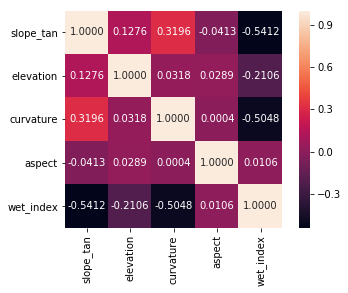

In [15]:
sns.heatmap(data123[['slope_tan', 'elevation', 'curvature', 'aspect', 'wet_index']].corr(), fmt='.4f', annot=True, square=True)

In [ ]:
# The skewness of continuous features

In [16]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p, inv_boxcox

In [17]:
value_feature = ['slope_tan', 'elevation', 'curvature', 'aspect', 'wet_index']
skew(data123[value_feature])

array([ 2.07958164, -0.17190017, -0.07818835, -0.1024321 ,  0.80592242])

### The skewness of "slope_tan" is obviouly larger than others, let's check its distribution

C:\Users\46541\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


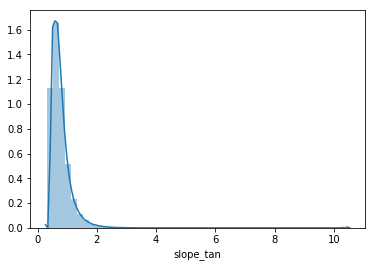

In [18]:
sns.distplot(data123["slope_tan"])

In [20]:
data123.loc[data123['slope_tan'] >=3, "LS_type"].value_counts()

0.0    1444
1.0      33
Name: LS_type, dtype: int64

### we need to make some transformation such that the distribution of "slope_tan" -> normal

C:\Users\46541\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.3889178081106096

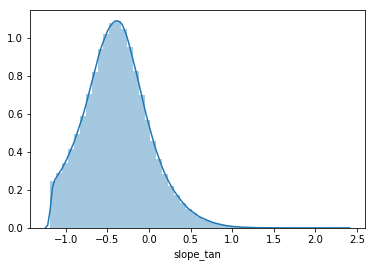

In [19]:
# log transformation
sns.distplot(np.log(data123["slope_tan"]))
skew(np.log(data123["slope_tan"]))

C:\Users\46541\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1.1122025054619

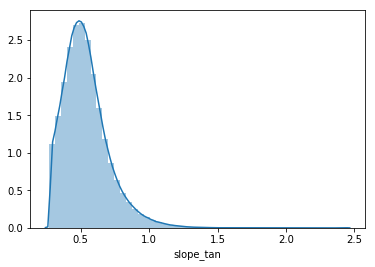

In [22]:
# log(x+1) transformation
sns.distplot(np.log1p(data123["slope_tan"]))
skew(np.log1p(data123["slope_tan"]))

In [46]:
# so we decide to use log transformation to "slope_tan"
data123["slope_tan"] = np.log(data123["slope_tan"])

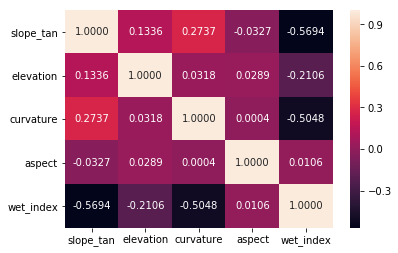

In [23]:
sns.heatmap(data123[['slope_tan', 'elevation', 'curvature', 'aspect', 'wet_index']].corr(), fmt='.4f', annot=True)

### Comparsion of the distributions of two classes in each features

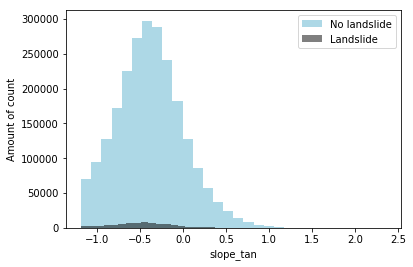

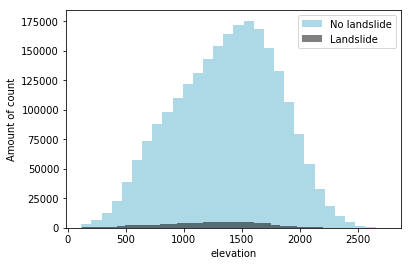

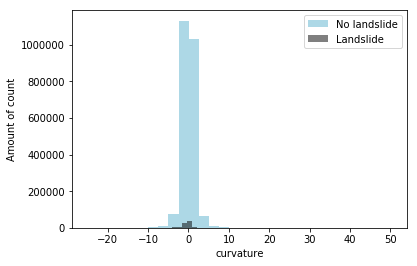

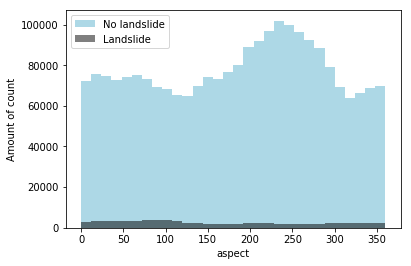

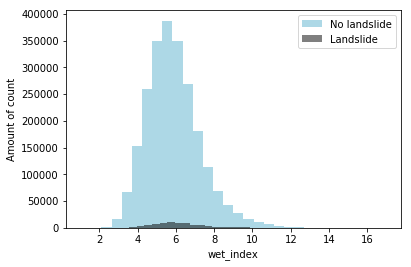

In [26]:
target = 'LS_type'
features = data123.columns[1:6]
for feature in features:

    bins = 30
    # 将特征的直方图画出来
    plt.hist(data123[feature][data123[target] == 0], bins=bins, color='lightblue', label= 'No landslide', alpha=1)
    plt.hist(data123[feature][data123[target] == 1], bins=bins, color='k', label='Landslide', alpha=0.5)
    
    plt.xlabel(feature)
    plt.ylabel('Amount of count')
    
    plt.legend()
    
    plt.show()

### We can do Chi square test to test whether there exists difference between two distributions

In [47]:
from scipy.stats import ks_2samp

In [48]:
feature = "slope_tan"
x_1 = data123[feature][data123["LS_type"] == 0]
x_2 = data123[feature][data123["LS_type"] == 1]

In [56]:
for feature in data123.columns[1:6]:
    print("The feature under testing is (%s)" %feature)
    x_1 = data123[feature][data123["LS_type"] == 0]
    x_2 = data123[feature][data123["LS_type"] == 1]
    res = ks_2samp(x_1, x_2)
    print("The ks statistic is",res[0], "and the p-value is", res[1])
    print("------------------------")
    

The feature under testing is (slope_tan)
The ks statistic is 0.09974835285412542 and the p-value is 0.0
------------------------
The feature under testing is (elevation)
The ks statistic is 0.12338381740142967 and the p-value is 0.0
------------------------
The feature under testing is (curvature)
The ks statistic is 0.12062760703045428 and the p-value is 0.0
------------------------
The feature under testing is (aspect)
The ks statistic is 0.13570036622651926 and the p-value is 0.0
------------------------
The feature under testing is (wet_index)
The ks statistic is 0.11270509655371103 and the p-value is 0.0
------------------------


### elevation

In [57]:
def PlotFeaturesByQuantile(data,feature,qcut=10):
    categories = pd.qcut(data[feature],qcut).cat.categories
    ind = categories.astype(str) 
    y = data['LS_type'].groupby(pd.qcut(data[feature],qcut)).mean().values
    plt.plot(ind,y,'o', color='red')
    plt.xticks(rotation = 90)
    plt.title("The frequency of landslide for feature '%s' in each quantile intervals" % feature)
    plt.show()
  

In [84]:
data123['LS_type'].groupby(pd.qcut(data123['elevation'],5)).value_counts()

elevation             LS_type
(116.539, 954.06]     0.0        461875
                      1.0         20236
(954.06, 1265.187]    0.0        463712
                      1.0         18400
(1265.187, 1513.712]  0.0        465481
                      1.0         16627
(1513.712, 1758.607]  0.0        468105
                      1.0         14005
(1758.607, 2741.52]   0.0        474395
                      1.0          7716
Name: LS_type, dtype: int64

In [85]:
461875 + 20236, 463712 + 18400

(482111, 482112)

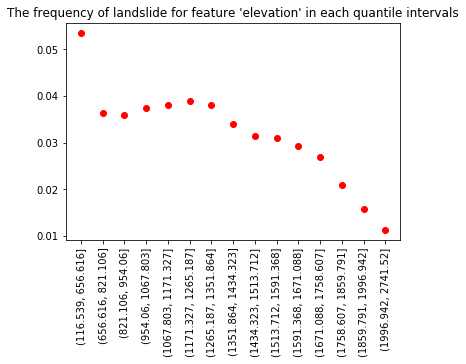

In [68]:
PlotFeaturesByQuantile(data123,"elevation",qcut=15)

### slope_tan

In [74]:
data123['LS_type'].groupby(pd.qcut(data123['slope_tan'],20)).value_counts()

slope_tan            LS_type
(-1.186, -1.007]     0.0        115430
                     1.0          5098
(-1.007, -0.884]     0.0        115677
                     1.0          4851
(-0.884, -0.79]      0.0        115825
                     1.0          4702
(-0.79, -0.715]      0.0        115813
                     1.0          4715
(-0.715, -0.65]      0.0        115866
                     1.0          4661
(-0.65, -0.594]      0.0        115977
                     1.0          4551
(-0.594, -0.542]     0.0        116178
                     1.0          4349
(-0.542, -0.493]     0.0        116154
                     1.0          4376
(-0.493, -0.446]     0.0        116196
                     1.0          4329
(-0.446, -0.4]       0.0        116456
                     1.0          4072
(-0.4, -0.354]       0.0        116490
                     1.0          4038
(-0.354, -0.308]     0.0        116772
                     1.0          3756
(-0.308, -0.259]     0.0        116

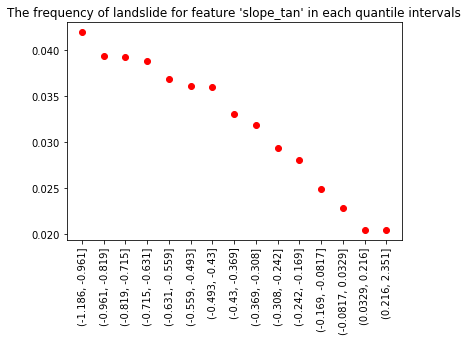

In [69]:
PlotFeaturesByQuantile(data123,"slope_tan",qcut=15)

### curvature

In [ ]:
def PlotFeaturesByQuantile2(data,feature,qcut=10):
    categories = pd.qcut(data[feature],qcut).cat.categories
    ind = categories.astype(str) 
    y = data['LS_type'].groupby(pd.qcut(data[feature],qcut)).mean().values
    plt.plot(ind,y,'o', color='red')
    plt.xticks(rotation = 90)
    plt.title("The frequency of landslide for feature '%s' in each quantile intervals" % feature)
    plt.show()

In [70]:
data_copy = data123.copy()
variable = "curvature"
valid_min = -24
valid_max = 50
data_copy[variable] = data_copy[variable].clip(valid_min, valid_max)

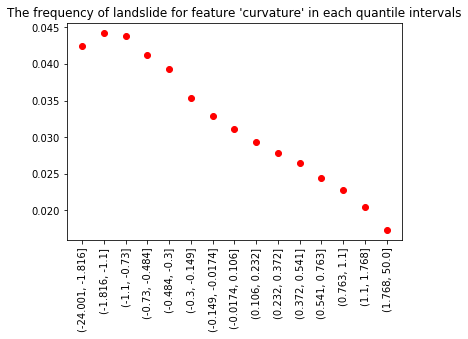

In [74]:
PlotFeaturesByQuantile(data_copy,"curvature",qcut=15)

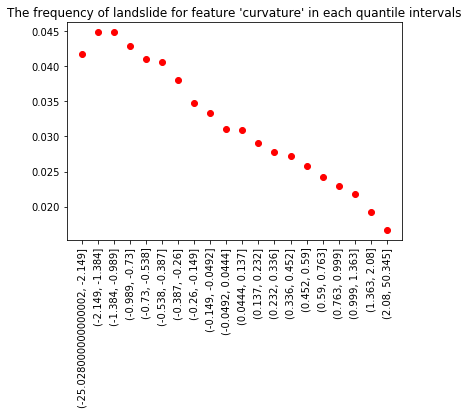

In [61]:
PlotFeaturesByQuantile(data123,"curvature",qcut=20)

In [157]:
sum(data123.curvature < -10), sum(data123.curvature > 10)

(1014, 921)

In [ ]:
'''
curvature has extremely large value and extremely small value, 
Question: Do we need to drop out those extreme data?
'''

In [63]:
def Outlier(data, variable="curvature", option=1): 
    if variable not in data:
        return
    data_copy = data.copy()
    if option == 1:
        variable_des = data[variable].describe()
        valid_max = variable_des["50%"] + 3*(variable_des['75%'] - variable_des["50%"])
        valid_min = variable_des["50%"] - 3*(variable_des["50%"] - variable_des["25%"])
        data_copy[variable] = data_copy[variable].clip(valid_min, valid_max)
        return data_copy
    else:
        data_WithoutOutliers = data_copy[np.abs(data_copy[variable]-data_copy[variable].mean())<=(3*data_copy[variable].std())] 
        return data_WithoutOutliers

In [64]:
data_clean = Outlier(data123, "curvature", option=2)

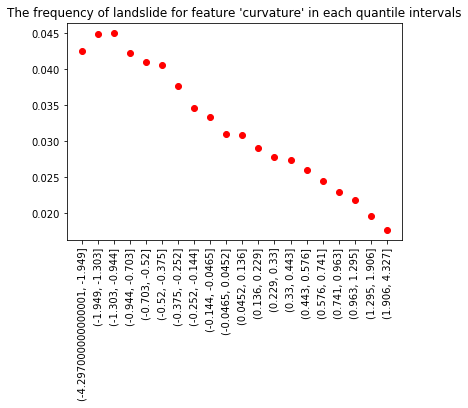

In [65]:
PlotFeaturesByQuantile(data_clean,"curvature",qcut=20)

In [169]:
data_clean.shape

(2362658, 8)

### aspect

In [30]:
data123['LS_type'].groupby(pd.qcut(data123["aspect"],20)).value_counts()

aspect              LS_type
(-0.00083, 18.899]  0.0        115878
                    1.0          4650
(18.899, 37.478]    0.0        115532
                    1.0          4996
(37.478, 56.337]    0.0        115313
                    1.0          5214
(56.337, 74.836]    0.0        115300
                    1.0          5228
(74.836, 94.235]    0.0        114557
                    1.0          5970
(94.235, 114.529]   0.0        114284
                    1.0          6244
(114.529, 135.872]  0.0        115782
                    1.0          4745
(135.872, 155.138]  0.0        117098
                    1.0          3430
(155.138, 174.193]  0.0        117712
                    1.0          2815
(174.193, 191.979]  0.0        117699
                    1.0          2829
(191.979, 207.733]  0.0        117512
                    1.0          3016
(207.733, 222.764]  0.0        117455
                    1.0          3072
(222.764, 236.836]  0.0        118135
                    1.

In [32]:
data123['LS_type'].groupby(pd.qcut(data123['aspect'],20)).mean()

aspect
(-0.00083, 18.899]    0.038580
(18.899, 37.478]      0.041451
(37.478, 56.337]      0.043260
(56.337, 74.836]      0.043376
(74.836, 94.235]      0.049532
(94.235, 114.529]     0.051805
(114.529, 135.872]    0.039369
(135.872, 155.138]    0.028458
(155.138, 174.193]    0.023356
(174.193, 191.979]    0.023472
(191.979, 207.733]    0.025023
(207.733, 222.764]    0.025488
(222.764, 236.836]    0.019862
(236.836, 250.976]    0.018610
(250.976, 265.687]    0.020070
(265.687, 281.136]    0.019664
(281.136, 298.174]    0.025679
(298.174, 318.849]    0.032192
(318.849, 339.911]    0.034531
(339.911, 360.0]      0.034946
Name: LS_type, dtype: float64

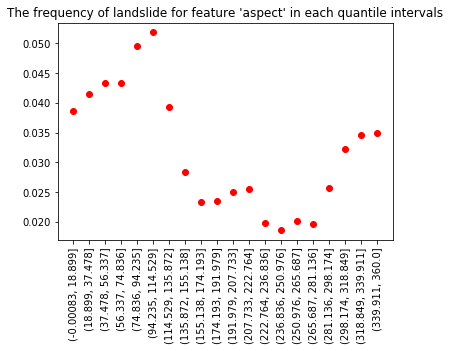

In [66]:
PlotFeaturesByQuantile(data123,"aspect",qcut=20)

C:\Users\46541\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


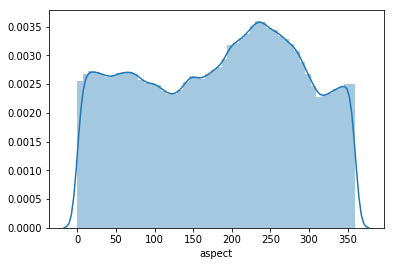

In [50]:
sns.distplot(data123["aspect"])

C:\Users\46541\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


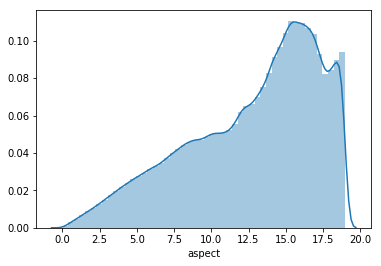

In [52]:
sns.distplot(data123["aspect"].apply(lambda x: x**0.5))

In [53]:
data123["aspect_try"] = data123["aspect"].apply(lambda x: x**0.5)

In [54]:
data123['LS_type'].groupby(pd.qcut(data123['aspect_try'],10)).value_counts()

aspect_try        LS_type
(0.012, 6.122]    0.0        231410
                  1.0          9646
(6.122, 8.651]    0.0        230613
                  1.0         10442
(8.651, 10.702]   0.0        228841
                  1.0         12214
(10.702, 12.455]  0.0        232880
                  1.0          8175
(12.455, 13.856]  0.0        235411
                  1.0          5644
(13.856, 14.925]  0.0        234967
                  1.0          6088
(14.925, 15.842]  0.0        236418
                  1.0          4637
(15.842, 16.767]  0.0        236266
                  1.0          4789
(16.767, 17.856]  0.0        234080
                  1.0          6975
(17.856, 18.974]  0.0        232682
                  1.0          8374
Name: LS_type, dtype: int64

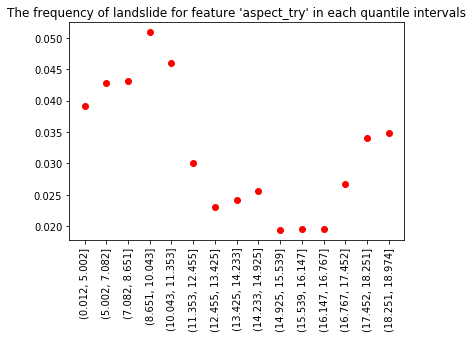

In [55]:
PlotFeaturesByQuantile(data123,'aspect_try',qcut=15)  

### wet index

In [29]:
data123['LS_type'].groupby(pd.qcut(data123['wet_index'],10)).value_counts()

wet_index        LS_type
(1.05, 4.223]    0.0        237007
                 1.0          4049
(4.223, 4.714]   0.0        235803
                 1.0          5252
(4.714, 5.087]   0.0        234915
                 1.0          6140
(5.087, 5.417]   0.0        234045
                 1.0          7010
(5.417, 5.734]   0.0        233093
                 1.0          7962
(5.734, 6.066]   0.0        232378
                 1.0          8677
(6.066, 6.44]    0.0        231813
                 1.0          9243
(6.44, 6.914]    0.0        231818
                 1.0          9237
(6.914, 7.682]   0.0        232048
                 1.0          9007
(7.682, 16.951]  0.0        230648
                 1.0         10407
Name: LS_type, dtype: int64

In [30]:
data123['LS_type'].groupby(pd.qcut(data123['wet_index'],10)).mean()

wet_index
(1.05, 4.223]      0.016797
(4.223, 4.714]     0.021788
(4.714, 5.087]     0.025471
(5.087, 5.417]     0.029081
(5.417, 5.734]     0.033030
(5.734, 6.066]     0.035996
(6.066, 6.44]      0.038344
(6.44, 6.914]      0.038319
(6.914, 7.682]     0.037365
(7.682, 16.951]    0.043173
Name: LS_type, dtype: float64

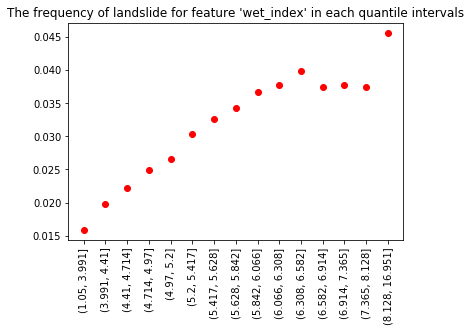

In [131]:
PlotFeaturesByQuantile("wet_index",qcut=15)  

## Transform continuous features into categorical data type

In [ ]:
'''
why we need to do this?
1. Some features do not make sense in numerical, e.g. "aspect";
2. Logistic regression is a linear model in reality, but we can introduce nonlinear effect 
by transforming continuous into categorical data;
3. Enrich the number of features (since we need to do one-hot encoding process for categorical data), so that
improve the expression of our model;
4. Strengthen the stability of model (e.g. age 15yrs, 16yrs, data may have niose: 16->15,=>error, we can treat
them equally).
'''

### Method 1: Equal frequency discretization

In [107]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]   # 待分箱数据
bins = [18, 25, 35, 60, 100]   
cats1 = pd.cut(ages, bins)
cats1

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [108]:
cats2 = pd.cut(ages, bins,labels=False)  
cats2  # 输出结果中的数字对应着不同的箱子

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int64)

In [42]:
ages = [100,200,20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]   # 待分箱数据
bins = np.sort([30,25, 35, 60, 100])
cats1 = pd.cut(ages, bins,labels=False)
cats1

array([ 3., nan, nan, nan, nan,  0., nan, nan,  2.,  1.,  3.,  2.,  2.,
        1.])

In [65]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]   # 待分箱数据
bins = [18, 25, 35, 60, 100]  
ages_min = min(ages)
ages_max = max(ages)

In [77]:
cc = slope_split.copy()
cc

[-0.3423106067843277,
 -0.629792735163468,
 -0.9384049588595463,
 -0.7358654510422589,
 -0.8166451906175554,
 -0.42856192278659916,
 -0.5559830443458078,
 -0.49805460482946484,
 -0.127105625018055,
 -0.21826994664199223,
 -0.28930492189322654,
 -0.007290309848133899,
 0.10552870151217275]

### Method 2: Cut by Information gain

In [43]:
def calc_score_median(sample_set, var):
    var_list = list(np.unique(sample_set[var]))
    var_median_list = []
    for i in range(len(var_list) -1):
        var_median = (var_list[i] + var_list[i+1]) / 2
        var_median_list.append(var_median)
    return var_median_list

In [108]:
def choose_best_split(sample_set, var, min_sample):
    target = "LS_type"
    score_median_list = calc_score_median(sample_set, var)
    median_len = len(score_median_list)
    #print("The number of unique values in feature",var,"is",median_len)
    sample_cnt = sample_set.shape[0]    # The number of sample 
    sample1_cnt = sum(sample_set[target])  # The number of class 1
    sample0_cnt =  sample_cnt- sample1_cnt   # The number of class 2
    Gini = 1 - np.square(sample1_cnt / sample_cnt) - np.square(sample0_cnt / sample_cnt)
    
    bestGini = 0.0; bestSplit_point = 0.0; bestSplit_position = 0.0
    
    for i in range(1,median_len,10000):
        #print("In the function choose_best_split, it is the",i,"split point")
        left = sample_set[sample_set[var] < score_median_list[i]]
        right = sample_set[sample_set[var] > score_median_list[i]]
        
        left_cnt = left.shape[0]; right_cnt = right.shape[0]
        left1_cnt = sum(left[target]); right1_cnt = sum(right[target])
        left0_cnt =  left_cnt - left1_cnt; right0_cnt =  right_cnt - right1_cnt
        left_ratio = left_cnt / sample_cnt; right_ratio = right_cnt / sample_cnt
        
        if left_cnt < min_sample or right_cnt < min_sample:
            continue
        
        Gini_left = 1 - np.square(left1_cnt / left_cnt) - np.square(left0_cnt / left_cnt)
        Gini_right = 1 - np.square(right1_cnt / right_cnt) - np.square(right0_cnt / right_cnt)
        Gini_temp = Gini - (left_ratio * Gini_left + right_ratio * Gini_right)
        if Gini_temp > bestGini:
            bestGini = Gini_temp; bestSplit_point = score_median_list[i]
            if median_len > 1:
                bestSplit_position = i / (median_len - 1)
            else:
                bestSplit_position = i / median_len
        else:
            continue
               
    Gini = Gini - bestGini
    return bestSplit_point, bestSplit_position

In [109]:
def bining_data_split(sample_set, var, min_sample, split_list):
    split, position = choose_best_split(sample_set, var, min_sample)
    if split != 0.0:
        split_list.append(split)
    sample_set_left = sample_set[sample_set[var] < split]
    sample_set_right = sample_set[sample_set[var] > split]
    if len(sample_set_left) >= min_sample * 2 and position not in [0.0, 1.0]:
        #print("to left tree")
        bining_data_split(sample_set_left, var, min_sample, split_list)
    else:
        None
    if len(sample_set_right) >= min_sample * 2 and position not in [0.0, 1.0]:
        #print("to the right")
        bining_data_split(sample_set_right, var, min_sample, split_list)
    else:
        None

In [46]:
def get_bestsplit_list(sample_set, var):
    min_df = sample_set.shape[0] * 0.05
    split_list = []
    bining_data_split(sample_set, var, min_df, split_list)
    return split_list

In [ ]:
# slope_tan

In [47]:
slope_split = get_bestsplit_list(data123,"slope_tan")

The number of unique values in feature slope_tan is 1964574
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
In the function choose_best_split, it is the 140001 split 

In the function choose_best_split, it is the 1270001 split point
In the function choose_best_split, it is the 1280001 split point
In the function choose_best_split, it is the 1290001 split point
In the function choose_best_split, it is the 1300001 split point
In the function choose_best_split, it is the 1310001 split point
In the function choose_best_split, it is the 1320001 split point
In the function choose_best_split, it is the 1330001 split point
In the function choose_best_split, it is the 1340001 split point
In the function choose_best_split, it is the 1350001 split point
In the function choose_best_split, it is the 1360001 split point
In the function choose_best_split, it is the 1370001 split point
In the function choose_best_split, it is the 1380001 split point
In the function choose_best_split, it is the 1390001 split point
In the function choose_best_split, it is the 1400001 split point
In the function choose_best_split, it is the 1410001 split point
In the function choose_be

In the function choose_best_split, it is the 560001 split point
In the function choose_best_split, it is the 570001 split point
In the function choose_best_split, it is the 580001 split point
In the function choose_best_split, it is the 590001 split point
In the function choose_best_split, it is the 600001 split point
In the function choose_best_split, it is the 610001 split point
In the function choose_best_split, it is the 620001 split point
In the function choose_best_split, it is the 630001 split point
In the function choose_best_split, it is the 640001 split point
In the function choose_best_split, it is the 650001 split point
In the function choose_best_split, it is the 660001 split point
In the function choose_best_split, it is the 670001 split point
In the function choose_best_split, it is the 680001 split point
In the function choose_best_split, it is the 690001 split point
In the function choose_best_split, it is the 700001 split point
In the function choose_best_split, it is

In the function choose_best_split, it is the 240001 split point
In the function choose_best_split, it is the 250001 split point
In the function choose_best_split, it is the 260001 split point
In the function choose_best_split, it is the 270001 split point
In the function choose_best_split, it is the 280001 split point
In the function choose_best_split, it is the 290001 split point
In the function choose_best_split, it is the 300001 split point
In the function choose_best_split, it is the 310001 split point
In the function choose_best_split, it is the 320001 split point
In the function choose_best_split, it is the 330001 split point
In the function choose_best_split, it is the 340001 split point
In the function choose_best_split, it is the 350001 split point
In the function choose_best_split, it is the 360001 split point
In the function choose_best_split, it is the 370001 split point
to left tree
The number of unique values in feature slope_tan is 220001
In the function choose_best_spli

In the function choose_best_split, it is the 360001 split point
In the function choose_best_split, it is the 370001 split point
to the right
The number of unique values in feature slope_tan is 249999
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 1

In the function choose_best_split, it is the 150001 split point
In the function choose_best_split, it is the 160001 split point
In the function choose_best_split, it is the 170001 split point
In the function choose_best_split, it is the 180001 split point
In the function choose_best_split, it is the 190001 split point
In the function choose_best_split, it is the 200001 split point
In the function choose_best_split, it is the 210001 split point
In the function choose_best_split, it is the 220001 split point
In the function choose_best_split, it is the 230001 split point
In the function choose_best_split, it is the 240001 split point
In the function choose_best_split, it is the 250001 split point
In the function choose_best_split, it is the 260001 split point
In the function choose_best_split, it is the 270001 split point
In the function choose_best_split, it is the 280001 split point
In the function choose_best_split, it is the 290001 split point
In the function choose_best_split, it is

The number of unique values in feature slope_tan is 204566
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
In the function choose_best_split, it is the 140001 split p

In [48]:
print(slope_split)

[-0.3423106067843277, -0.629792735163468, -0.9384049588595463, -0.7358654510422589, -0.8166451906175554, -0.42856192278659916, -0.5559830443458078, -0.49805460482946484, -0.127105625018055, -0.21826994664199223, -0.28930492189322654, -0.007290309848133899, 0.10552870151217275]


In [ ]:
# elevation

In [49]:
elevation_split = get_bestsplit_list(data123,"elevation")

The number of unique values in feature elevation is 1451022
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
In the function choose_best_split, it is the 140001 split 

In the function choose_best_split, it is the 1270001 split point
In the function choose_best_split, it is the 1280001 split point
In the function choose_best_split, it is the 1290001 split point
In the function choose_best_split, it is the 1300001 split point
In the function choose_best_split, it is the 1310001 split point
In the function choose_best_split, it is the 1320001 split point
In the function choose_best_split, it is the 1330001 split point
In the function choose_best_split, it is the 1340001 split point
In the function choose_best_split, it is the 1350001 split point
In the function choose_best_split, it is the 1360001 split point
In the function choose_best_split, it is the 1370001 split point
In the function choose_best_split, it is the 1380001 split point
In the function choose_best_split, it is the 1390001 split point
In the function choose_best_split, it is the 1400001 split point
In the function choose_best_split, it is the 1410001 split point
In the function choose_be

In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
In the function choose_best_split, it is the 140001 split point
In the function choose_best_split, it is the 150001 split point
In the function choose_best_split, it is the 160001 split point
In the function choose_best_split, it is the 170

In the function choose_best_split, it is the 360001 split point
In the function choose_best_split, it is the 370001 split point
In the function choose_best_split, it is the 380001 split point
In the function choose_best_split, it is the 390001 split point
In the function choose_best_split, it is the 400001 split point
In the function choose_best_split, it is the 410001 split point
In the function choose_best_split, it is the 420001 split point
In the function choose_best_split, it is the 430001 split point
In the function choose_best_split, it is the 440001 split point
In the function choose_best_split, it is the 450001 split point
In the function choose_best_split, it is the 460001 split point
In the function choose_best_split, it is the 470001 split point
In the function choose_best_split, it is the 480001 split point
In the function choose_best_split, it is the 490001 split point
In the function choose_best_split, it is the 500001 split point
In the function choose_best_split, it is

In the function choose_best_split, it is the 240001 split point
In the function choose_best_split, it is the 250001 split point
In the function choose_best_split, it is the 260001 split point
In the function choose_best_split, it is the 270001 split point
In the function choose_best_split, it is the 280001 split point
In the function choose_best_split, it is the 290001 split point
In the function choose_best_split, it is the 300001 split point
In the function choose_best_split, it is the 310001 split point
to left tree
The number of unique values in feature elevation is 260001
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is t

to left tree
The number of unique values in feature elevation is 140001
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
to the right
The number of unique values in fe

In [50]:
print(elevation_split)

[1651.5585, 606.59675, 1398.3705, 1003.4685, 762.5390500000001, 886.60205, 1328.0194999999999, 1195.336, 1094.7205, 1559.6644999999999, 1490.7975, 1820.0715, 1746.1475, 1927.8609999999999]


In [75]:
max(data123.elevation), min(data123.elevation)

(2741.52, 116.5398)

In [ ]:
# curvation

In [52]:
curvature_split = get_bestsplit_list(data123,'curvature')

The number of unique values in feature curvature is 666659
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
In the function choose_best_split, it is the 140001 split p

to left tree
The number of unique values in feature curvature is 200001
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
In the function choose_best_split, it is the 1

In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point


In [53]:
print(curvature_split)

[-0.08590020000000001, -0.41530609999999996, -0.9568583, -1.9420609999999998, -0.6311866, -0.2799445, 0.5599738000000001, 0.1647966, 0.039750839999999996, 0.423133, 0.29158700000000004, 1.424608, 0.86531235]


In [ ]:
# aspect

In [54]:
aspect_split = get_bestsplit_list(data123, "aspect")

The number of unique values in feature aspect is 1893548
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
In the function choose_best_split, it is the 140001 split poi

In the function choose_best_split, it is the 1270001 split point
In the function choose_best_split, it is the 1280001 split point
In the function choose_best_split, it is the 1290001 split point
In the function choose_best_split, it is the 1300001 split point
In the function choose_best_split, it is the 1310001 split point
In the function choose_best_split, it is the 1320001 split point
In the function choose_best_split, it is the 1330001 split point
In the function choose_best_split, it is the 1340001 split point
In the function choose_best_split, it is the 1350001 split point
In the function choose_best_split, it is the 1360001 split point
In the function choose_best_split, it is the 1370001 split point
In the function choose_best_split, it is the 1380001 split point
In the function choose_best_split, it is the 1390001 split point
In the function choose_best_split, it is the 1400001 split point
In the function choose_best_split, it is the 1410001 split point
In the function choose_be

In the function choose_best_split, it is the 660001 split point
In the function choose_best_split, it is the 670001 split point
In the function choose_best_split, it is the 680001 split point
In the function choose_best_split, it is the 690001 split point
In the function choose_best_split, it is the 700001 split point
In the function choose_best_split, it is the 710001 split point
In the function choose_best_split, it is the 720001 split point
In the function choose_best_split, it is the 730001 split point
In the function choose_best_split, it is the 740001 split point
In the function choose_best_split, it is the 750001 split point
to left tree
The number of unique values in feature aspect is 440001
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is th

In the function choose_best_split, it is the 140001 split point
In the function choose_best_split, it is the 150001 split point
In the function choose_best_split, it is the 160001 split point
In the function choose_best_split, it is the 170001 split point
In the function choose_best_split, it is the 180001 split point
In the function choose_best_split, it is the 190001 split point
In the function choose_best_split, it is the 200001 split point
In the function choose_best_split, it is the 210001 split point
In the function choose_best_split, it is the 220001 split point
In the function choose_best_split, it is the 230001 split point
In the function choose_best_split, it is the 240001 split point
In the function choose_best_split, it is the 250001 split point
In the function choose_best_split, it is the 260001 split point
In the function choose_best_split, it is the 270001 split point
In the function choose_best_split, it is the 280001 split point
In the function choose_best_split, it is

In the function choose_best_split, it is the 280001 split point
In the function choose_best_split, it is the 290001 split point
In the function choose_best_split, it is the 300001 split point
In the function choose_best_split, it is the 310001 split point
In the function choose_best_split, it is the 320001 split point
In the function choose_best_split, it is the 330001 split point
In the function choose_best_split, it is the 340001 split point
In the function choose_best_split, it is the 350001 split point
In the function choose_best_split, it is the 360001 split point
In the function choose_best_split, it is the 370001 split point
In the function choose_best_split, it is the 380001 split point
In the function choose_best_split, it is the 390001 split point
In the function choose_best_split, it is the 400001 split point
In the function choose_best_split, it is the 410001 split point
In the function choose_best_split, it is the 420001 split point
In the function choose_best_split, it is

In the function choose_best_split, it is the 300001 split point
In the function choose_best_split, it is the 310001 split point
In the function choose_best_split, it is the 320001 split point
In the function choose_best_split, it is the 330001 split point
to left tree
The number of unique values in feature aspect is 220001
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 1000

In the function choose_best_split, it is the 220001 split point
In the function choose_best_split, it is the 230001 split point
In the function choose_best_split, it is the 240001 split point
In the function choose_best_split, it is the 250001 split point
to the right
The number of unique values in feature aspect is 169997
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 1000

In [55]:
print(aspect_split)

[132.4419, 70.312195, 28.5967, 51.283065, 109.26135, 300.11735, 219.51515, 152.0301, 197.43855000000002, 177.5426, 282.0914, 235.28535, 250.99765000000002, 323.1462]


In [149]:
# wet_index

In [86]:
wet_split = get_bestsplit_list(data123,"wet_index")

The number of unique values in feature wet_index is 1884743
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
In the function choose_best_split, it is the 140001 split 

In the function choose_best_split, it is the 1270001 split point
In the function choose_best_split, it is the 1280001 split point
In the function choose_best_split, it is the 1290001 split point
In the function choose_best_split, it is the 1300001 split point
In the function choose_best_split, it is the 1310001 split point
In the function choose_best_split, it is the 1320001 split point
In the function choose_best_split, it is the 1330001 split point
In the function choose_best_split, it is the 1340001 split point
In the function choose_best_split, it is the 1350001 split point
In the function choose_best_split, it is the 1360001 split point
In the function choose_best_split, it is the 1370001 split point
In the function choose_best_split, it is the 1380001 split point
In the function choose_best_split, it is the 1390001 split point
In the function choose_best_split, it is the 1400001 split point
In the function choose_best_split, it is the 1410001 split point
In the function choose_be

In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
In the function choose_best_split, it is the 140001 split point
In the function choose_best_split, it is the 150001 sp

In the function choose_best_split, it is the 420001 split point
In the function choose_best_split, it is the 430001 split point
In the function choose_best_split, it is the 440001 split point
In the function choose_best_split, it is the 450001 split point
In the function choose_best_split, it is the 460001 split point
In the function choose_best_split, it is the 470001 split point
In the function choose_best_split, it is the 480001 split point
In the function choose_best_split, it is the 490001 split point
In the function choose_best_split, it is the 500001 split point
In the function choose_best_split, it is the 510001 split point
In the function choose_best_split, it is the 520001 split point
In the function choose_best_split, it is the 530001 split point
In the function choose_best_split, it is the 540001 split point
In the function choose_best_split, it is the 550001 split point
In the function choose_best_split, it is the 560001 split point
In the function choose_best_split, it is

In the function choose_best_split, it is the 440001 split point
In the function choose_best_split, it is the 450001 split point
In the function choose_best_split, it is the 460001 split point
In the function choose_best_split, it is the 470001 split point
In the function choose_best_split, it is the 480001 split point
In the function choose_best_split, it is the 490001 split point
In the function choose_best_split, it is the 500001 split point
In the function choose_best_split, it is the 510001 split point
In the function choose_best_split, it is the 520001 split point
In the function choose_best_split, it is the 530001 split point
In the function choose_best_split, it is the 540001 split point
In the function choose_best_split, it is the 550001 split point
In the function choose_best_split, it is the 560001 split point
In the function choose_best_split, it is the 570001 split point
In the function choose_best_split, it is the 580001 split point
In the function choose_best_split, it is

In the function choose_best_split, it is the 90001 split point
In the function choose_best_split, it is the 100001 split point
In the function choose_best_split, it is the 110001 split point
In the function choose_best_split, it is the 120001 split point
In the function choose_best_split, it is the 130001 split point
In the function choose_best_split, it is the 140001 split point
In the function choose_best_split, it is the 150001 split point
In the function choose_best_split, it is the 160001 split point
In the function choose_best_split, it is the 170001 split point
In the function choose_best_split, it is the 180001 split point
In the function choose_best_split, it is the 190001 split point
In the function choose_best_split, it is the 200001 split point
In the function choose_best_split, it is the 210001 split point
In the function choose_best_split, it is the 220001 split point
In the function choose_best_split, it is the 230001 split point
In the function choose_best_split, it is 

In the function choose_best_split, it is the 590001 split point
In the function choose_best_split, it is the 600001 split point
In the function choose_best_split, it is the 610001 split point
In the function choose_best_split, it is the 620001 split point
In the function choose_best_split, it is the 630001 split point
to left tree
The number of unique values in feature wet_index is 250001
In the function choose_best_split, it is the 1 split point
In the function choose_best_split, it is the 10001 split point
In the function choose_best_split, it is the 20001 split point
In the function choose_best_split, it is the 30001 split point
In the function choose_best_split, it is the 40001 split point
In the function choose_best_split, it is the 50001 split point
In the function choose_best_split, it is the 60001 split point
In the function choose_best_split, it is the 70001 split point
In the function choose_best_split, it is the 80001 split point
In the function choose_best_split, it is the 

In [87]:
print(wet_split)

[5.2054314999999995, 4.513567500000001, 3.961894, 4.795399, 5.006821, 8.359619, 5.833190999999999, 5.5107845, 6.129934, 6.6900135, 6.3179775, 7.543854, 6.964188999999999]


In [171]:
def ContinousToCategorical(data, features):
    d = data.copy()
    split_info = []
    for feature in features:
        print("Feature:",feature)
        feature_min = min(d[feature])-1   # min-1 and max+1 is in order to avoid missing data
        feature_max = max(d[feature])+1
        feature_split = get_bestsplit_list(d,feature)
        feature_split.append(feature_min)
        feature_split.append(feature_max)
        feature_split = np.sort(feature_split)
        a = pd.cut(d[feature], feature_split).cat.categories
        for i in range(len(a)):
            print("The",i+1,"class is in the interval",a[i])
        ind = a.astype(str)
        split_info.append(ind)
        split_info.append("*")
        d[feature] = pd.cut(d[feature], feature_split,labels=False)
        print("------------------------")
    return d, split_info
    

In [172]:
cols = data123.columns[1:6]
data_new, split_info = ContinousToCategorical(data123, cols)

Feature: slope_tan
The 1 class is in the interval (-2.185, -0.938]
The 2 class is in the interval (-0.938, -0.817]
The 3 class is in the interval (-0.817, -0.736]
The 4 class is in the interval (-0.736, -0.63]
The 5 class is in the interval (-0.63, -0.556]
The 6 class is in the interval (-0.556, -0.498]
The 7 class is in the interval (-0.498, -0.429]
The 8 class is in the interval (-0.429, -0.342]
The 9 class is in the interval (-0.342, -0.289]
The 10 class is in the interval (-0.289, -0.218]
The 11 class is in the interval (-0.218, -0.127]
The 12 class is in the interval (-0.127, -0.00729]
The 13 class is in the interval (-0.00729, 0.106]
The 14 class is in the interval (0.106, 3.351]
------------------------
Feature: elevation
The 1 class is in the interval (115.54, 606.597]
The 2 class is in the interval (606.597, 762.539]
The 3 class is in the interval (762.539, 886.602]
The 4 class is in the interval (886.602, 1003.468]
The 5 class is in the interval (1003.468, 1094.72]
The 6 clas

In [173]:
data_new.head()

,LS_type,slope_tan,elevation,curvature,aspect,wet_index,litho,lulc
0,0.0,11,14,13,3,0,5.0,71.0
1,0.0,12,14,13,2,0,5.0,71.0
2,0.0,7,14,1,1,2,5.0,71.0
3,0.0,1,14,1,1,4,5.0,31.0
4,0.0,0,14,10,2,3,5.0,52.0


In [174]:
print("There are",data_new.isnull().sum().sum(), "data lost")

There are 0 data lost


In [177]:
split_info

[Index(['(-2.185, -0.938]', '(-0.938, -0.817]', '(-0.817, -0.736]',
        '(-0.736, -0.63]', '(-0.63, -0.556]', '(-0.556, -0.498]',
        '(-0.498, -0.429]', '(-0.429, -0.342]', '(-0.342, -0.289]',
        '(-0.289, -0.218]', '(-0.218, -0.127]', '(-0.127, -0.00729]',
        '(-0.00729, 0.106]', '(0.106, 3.351]'],
       dtype='object'),
 '*',
 Index(['(115.54, 606.597]', '(606.597, 762.539]', '(762.539, 886.602]',
        '(886.602, 1003.468]', '(1003.468, 1094.72]', '(1094.72, 1195.336]',
        '(1195.336, 1328.019]', '(1328.019, 1398.37]', '(1398.37, 1490.798]',
        '(1490.798, 1559.664]', '(1559.664, 1651.558]', '(1651.558, 1746.148]',
        '(1746.148, 1820.072]', '(1820.072, 1927.861]', '(1927.861, 2742.52]'],
       dtype='object'),
 '*',
 Index(['(-26.027, -1.942]', '(-1.942, -0.957]', '(-0.957, -0.631]',
        '(-0.631, -0.415]', '(-0.415, -0.28]', '(-0.28, -0.0859]',
        '(-0.0859, 0.0398]', '(0.0398, 0.165]', '(0.165, 0.292]',
        '(0.292, 0.423]', '(0.

In [135]:
data_new.slope_tan.value_counts(normalize=True)

13.0    0.101955
7.0     0.094065
3.0     0.082486
11.0    0.078816
10.0    0.077659
0.0     0.075905
6.0     0.074061
9.0     0.070397
4.0     0.068478
1.0     0.058945
5.0     0.058342
8.0     0.056537
12.0    0.052234
2.0     0.050122
Name: slope_tan, dtype: float64

In [136]:
pd.crosstab(data_new.LS_type, data_new.slope_tan)

slope_tan,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
LS_type,,,,,,,,,,,,,,
0.0,175329,136551,116013,191157,158997,135550,172145,219236,132116,164744,182182,185531,123248,240769
1.0,7645,5538,4809,7679,6073,5086,6382,7513,4169,4951,5018,4458,2664,4998


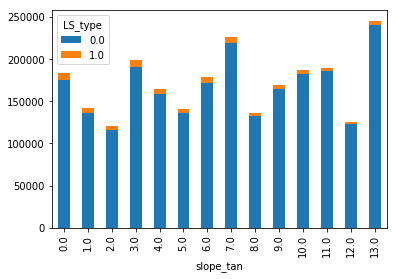

In [147]:
pd.crosstab(data_new.slope_tan, data_new.LS_type).plot(kind = 'bar',stacked=True)
plt.show()

In [ ]:
# elevation

In [127]:
data_new.elevation.value_counts(normalize=True)

6.0     0.098044
14.0    0.096751
10.0    0.077994
8.0     0.076906
11.0    0.073592
5.0     0.066630
3.0     0.063212
13.0    0.061084
9.0     0.058689
2.0     0.057195
1.0     0.056544
7.0     0.055889
4.0     0.055360
12.0    0.051184
0.0     0.050927
Name: elevation, dtype: float64

In [137]:
pd.crosstab(data_new.LS_type, data_new.elevation)

elevation,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
LS_type,,,,,,,,,,,,,,,
0.0,115687,131162,132988,146782,128272,154601,227128,129892,179545,136967,182377,172580,120561,144632,230393
1.0,7074,5140,4883,5593,5176,6013,9213,4831,5840,4505,5632,4817,2821,2615,2831


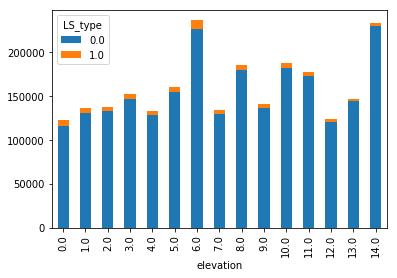

In [148]:
pd.crosstab(data_new.elevation, data_new.LS_type).plot(kind = 'bar',stacked=True)
plt.show()

In [ ]:
# curvature

In [129]:
data_new.curvature.value_counts(normalize=True)

1.0     0.095534
13.0    0.093626
5.0     0.089452
11.0    0.083659
12.0    0.082577
2.0     0.068893
7.0     0.067504
6.0     0.066301
3.0     0.065671
8.0     0.064283
0.0     0.059698
9.0     0.059262
4.0     0.051872
10.0    0.051667
Name: curvature, dtype: float64

In [150]:
pd.crosstab(data_new.LS_type, data_new.curvature)

curvature,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
LS_type,,,,,,,,,,,,,,
0.0,137870,219928,159093,151803,120257,208189,154739,157738,150550,138934,121275,196835,194662,221694
1.0,6036,10362,6977,6500,4784,7440,5083,4983,4407,3920,3271,4829,4395,3997


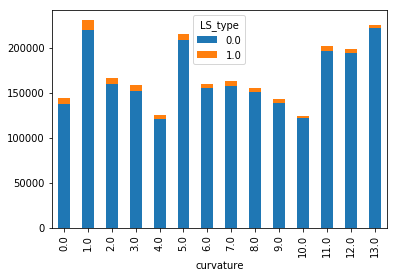

In [149]:
pd.crosstab(data_new.curvature, data_new.LS_type).plot(kind = 'bar',stacked=True)
plt.show()

In [ ]:
# aspect

In [130]:
data_new.aspect.value_counts(normalize=True)

11.0    0.102926
3.0     0.099610
14.0    0.090048
0.0     0.076324
8.0     0.072115
6.0     0.067357
1.0     0.059995
7.0     0.057732
10.0    0.055643
9.0     0.055453
13.0    0.054768
4.0     0.054271
12.0    0.052181
2.0     0.051522
5.0     0.050055
Name: aspect, dtype: float64

In [139]:
pd.crosstab(data_new.LS_type, data_new.aspect)

aspect,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
LS_type,,,,,,,,,,,,,,,
0.0,176782,138353,118964,227937,125344,117067,158571,135829,169328,130911,131636,243170,122515,127676,209484
1.0,7201,6268,5233,12179,5479,3592,3797,3337,4508,2762,2494,4938,3269,4345,7582


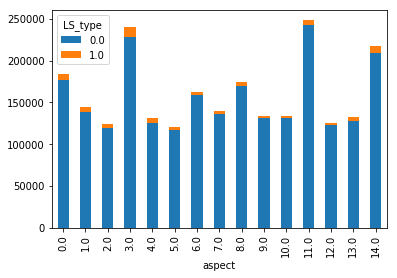

In [151]:
pd.crosstab(data_new.aspect, data_new.LS_type).plot(kind = 'bar',stacked=True)
plt.show()

In [ ]:
# wet_index

In [131]:
data_new.wet_index.value_counts(normalize=True)

6.0     0.101163
5.0     0.094652
1.0     0.091458
9.0     0.087490
7.0     0.087264
11.0    0.078141
2.0     0.065387
0.0     0.063165
12.0    0.059135
4.0     0.058115
3.0     0.056773
13.0    0.054102
10.0    0.051891
8.0     0.051263
Name: wet_index, dtype: float64

In [140]:
pd.crosstab(data_new.LS_type, data_new.wet_index)

wet_index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
LS_type,,,,,,,,,,,,,,
0.0,149864,216053,154009,133348,136317,221174,235587,202671,118827,202543,120471,181332,137100,124271
1.0,2398,4412,3609,3507,3771,6990,8272,7683,4746,8357,4615,7032,5447,6145


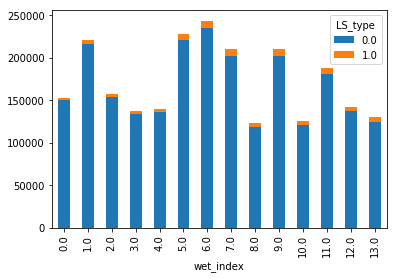

In [152]:
pd.crosstab(data_new.wet_index, data_new.LS_type).plot(kind = 'bar',stacked=True)
plt.show()

## Categorical features

In [61]:
data123.columns

Index(['LS_type', 'slope_tan', 'elevation', 'curvature', 'aspect', 'wet_index',
       'litho', 'lulc'],
      dtype='object')

### litho

In [66]:
data123.litho.value_counts()

5.0    1140394
6.0     591754
3.0     395836
1.0     182407
7.0      53935
4.0      45815
2.0        411
Name: litho, dtype: int64

In [63]:
pd.crosstab(data123.LS_type, data123.litho)

litho,1.0,2.0,3.0,4.0,5.0,6.0,7.0
LS_type,,,,,,,
0.0,164323,381,386760,42274,1110431,577071,52328
1.0,18084,30,9076,3541,29963,14683,1607


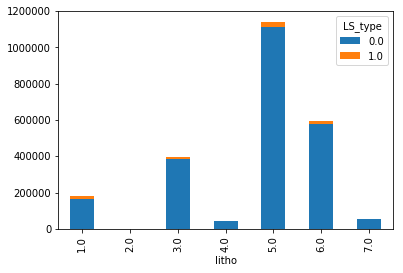

In [71]:
pd.crosstab(data123.litho, data123.LS_type).plot(kind = 'bar',stacked=True)
plt.show()

### lulc

In [69]:
data123.lulc.value_counts()

41.0    1395247
52.0     404218
31.0     327350
71.0     279266
21.0       4471
Name: lulc, dtype: int64

In [158]:
data123["LS_type"].groupby(data123["lulc"]).value_counts()

lulc  LS_type
21.0  0.0           4240
      1.0            231
31.0  0.0         315877
      1.0          11473
41.0  0.0        1357139
      1.0          38108
52.0  0.0         387052
      1.0          17166
71.0  0.0         269260
      1.0          10006
Name: LS_type, dtype: int64

In [160]:
data123["LS_type"].groupby(data123["lulc"]).mean()

lulc
21.0    0.051666
31.0    0.035048
41.0    0.027313
52.0    0.042467
71.0    0.035830
Name: LS_type, dtype: float64

In [64]:
pd.crosstab(data123.LS_type, data123.lulc)

lulc,21.0,31.0,41.0,52.0,71.0
LS_type,,,,,
0.0,4240,315877,1357139,387052,269260
1.0,231,11473,38108,17166,10006


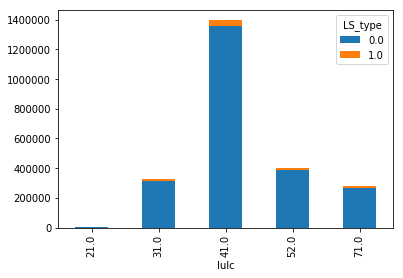

In [70]:
pd.crosstab(data123.lulc, data123.LS_type).plot(kind = 'bar',stacked=True)
plt.show()